In [201]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline

In [265]:
complaints_data = pd.read_csv('complaints.csv')
complaints_data.head(3)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN


### Finding the number of complaints by product and showing the results in both raw data and a graphical representation.

In [203]:
product = complaints_data['Product'].value_counts()
product

Mortgage                   3002
Debt collection            2942
Credit reporting           2113
Bank account or service    1136
Credit card                1100
Consumer loan               578
Student loan                340
Payday loan                 141
Money transfers             107
Prepaid card                 70
Other financial service      14
Name: Product, dtype: int64

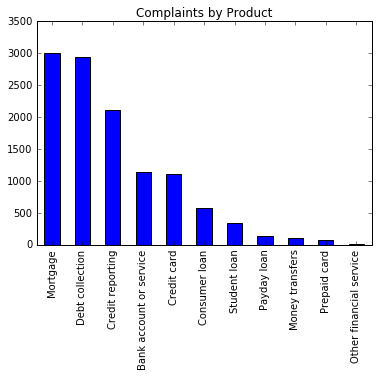

In [221]:
product.plot(kind='bar', color='blue', title='Complaints by Product')

## Observations:
##### Mortgage and debt collection compose about half of all the complaints received by companies.  There is a significant decrease to between the top two products and the third, credit reporting, which is followed by another significant decrease towards the rest of the data.  The products that are complained about less have a much smaller difference in the number of complaints receieved.  

### Finding the number of complaints by company.  The raw data and graphical representation show only the top 10 companies.

In [270]:
top_companies = complaints_data['Company'].value_counts().head(10)
top_companies

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
Capital One            252
Name: Company, dtype: int64

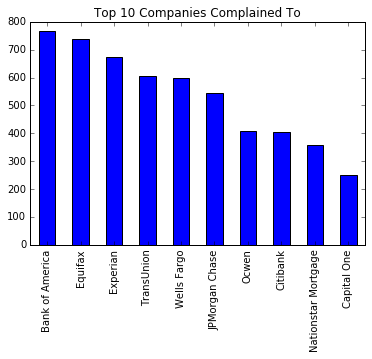

In [226]:
top_companies.plot(kind='bar', color='blue', title='Top 10 Companies Complained To')

## Observations:
##### The complaints recieved by the top ten companies are slightly less than have the number of complaints raised to all companies.  Knowing this is true, indicates that there are a plethora of companies that recieved very few complaints, or that the number of complaints does not decrease much for each remaining company.  Without seeing all of the data, one might assume that every company received a large number of complaints due to the fact that the y-values are at intervals of 100 and the total number of companies that were part of the data collection is never stated.  

In [229]:
company_response = complaints_data['Company response'].value_counts()
company_response

Closed with explanation            8185
Closed with non-monetary relief    1253
In progress                        1056
Closed with monetary relief         643
Closed                              239
Untimely response                   167
Name: Company response, dtype: int64

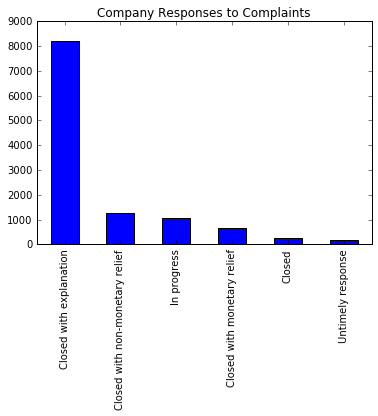

In [230]:
company_response.plot(kind='bar', color='blue', title='Company Responses to Complaints')

## Observations:
##### This graph shows that a high percentage of customers' complaints are closed with an explanation. There is a significant gap between the number of customers that had their complaint closed with an explanation and those who had their complaint closed with some non-monetary relief.  This data leads companies to the conclussion that most customers are complaining due to a lack of understanding about a product or service.

### Setting up data to find what day of the week each complaint was sent.

In [242]:
complaints_data['Date sent to company'] =  pd.to_datetime(complaints_data['Date sent to company'])
complaints_data['weekday'] = complaints_data['Date sent to company'].dt.weekday_name
complaints_data.head(3)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,weekday
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,2014-12-31,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN,Wednesday
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,2014-12-31,"Unique Management Services, Inc",Closed with explanation,Yes,NaN,Wednesday
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,2014-12-31,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN,Wednesday


In [259]:
complaints_data['weekday'].value_counts()

Monday       2609
Wednesday    2540
Tuesday      2450
Friday       1742
Thursday     1449
Saturday      429
Sunday        324
Name: weekday, dtype: int64

### Finding the mean number of complaints by day of week and showing the raw data as well as a graphical representation of the data.

In [260]:
my_mean = complaints_data.groupby(['weekday', 'Date sent to company']).size().groupby(level=0).mean()
my_mean.sort_index()

weekday
Friday       217.750
Monday       326.125
Saturday      85.800
Sunday        81.000
Thursday     181.125
Tuesday      306.250
Wednesday    317.500
dtype: float64

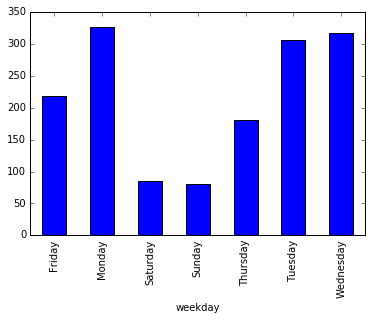

In [261]:
my_mean.plot(kind='bar', color='blue')

## Observations:
#####  This data shows that the least amount of complaints are made on the weekends, which would stand to reason since many businesses are closed on Saturday and Sunday.  The data shows that most people are complaining when offices open again on Monday.